In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv('../Data/iris.csv')

In [6]:
df.shape

(150, 5)

In [22]:
df.columns[1]

'sepal width (cm)'

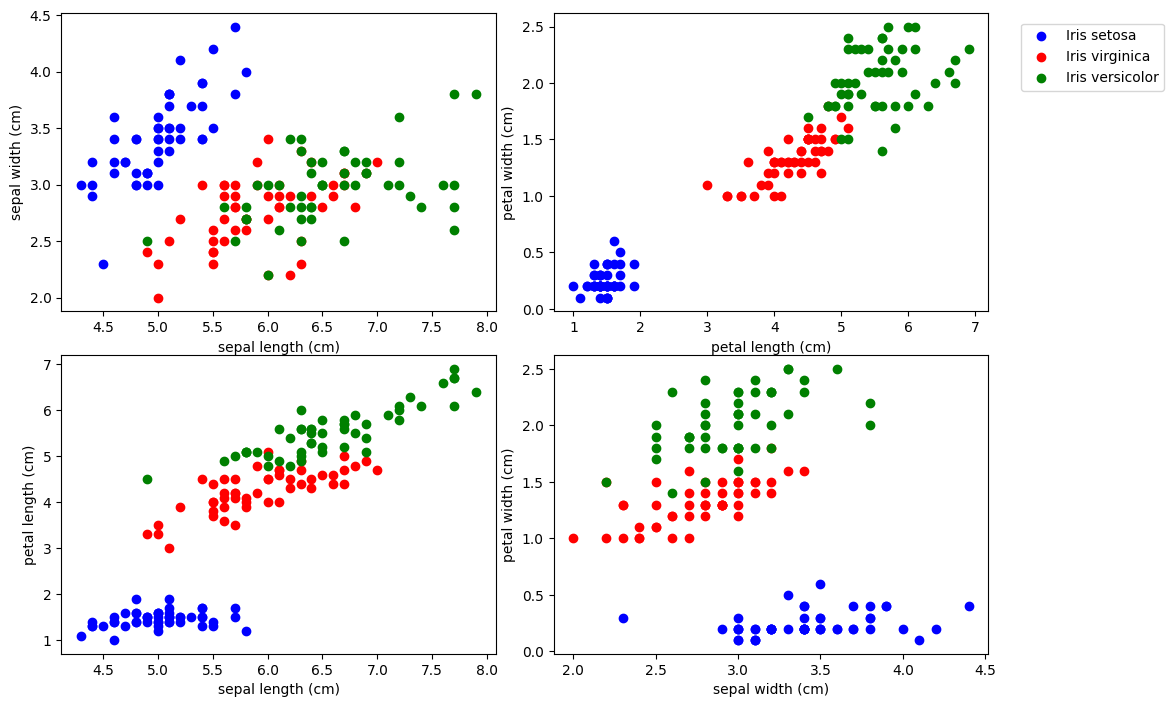

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [119]:
from sklearn.model_selection import train_test_split

X=df.drop('target',axis=1).values
Y=df['target'].values
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.2,random_state=33) 

In [120]:
y_test

array([1., 1., 0., 1., 2., 2., 0., 0., 2., 2., 2., 0., 2., 1., 2., 1., 2.,
       0., 1., 2., 0., 0., 2., 0., 2., 2., 1., 1., 2., 2.])

In [121]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [122]:
y_train=torch.LongTensor(y_train)#.reshape(-1,1)
y_test=torch.LongTensor(y_test)#.reshape(-1,1)
y_test

tensor([1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0,
        2, 2, 1, 1, 2, 2])

In [103]:
from torch.utils.data import TensorDataset,DataLoader
data=df.drop('target',axis=1).values
labels=df.target.values

In [104]:
iris=TensorDataset(torch.FloatTensor(data),torch.LongTensor(labels))
iris

In [105]:
for i in iris:
    print(i)#can iterate through this

(tensor([5.1000, 3.5000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.0000, 1.4000, 0.2000]), tensor(0))
(tensor([4.7000, 3.2000, 1.3000, 0.2000]), tensor(0))
(tensor([4.6000, 3.1000, 1.5000, 0.2000]), tensor(0))
(tensor([5.0000, 3.6000, 1.4000, 0.2000]), tensor(0))
(tensor([5.4000, 3.9000, 1.7000, 0.4000]), tensor(0))
(tensor([4.6000, 3.4000, 1.4000, 0.3000]), tensor(0))
(tensor([5.0000, 3.4000, 1.5000, 0.2000]), tensor(0))
(tensor([4.4000, 2.9000, 1.4000, 0.2000]), tensor(0))
(tensor([4.9000, 3.1000, 1.5000, 0.1000]), tensor(0))
(tensor([5.4000, 3.7000, 1.5000, 0.2000]), tensor(0))
(tensor([4.8000, 3.4000, 1.6000, 0.2000]), tensor(0))
(tensor([4.8000, 3.0000, 1.4000, 0.1000]), tensor(0))
(tensor([4.3000, 3.0000, 1.1000, 0.1000]), tensor(0))
(tensor([5.8000, 4.0000, 1.2000, 0.2000]), tensor(0))
(tensor([5.7000, 4.4000, 1.5000, 0.4000]), tensor(0))
(tensor([5.4000, 3.9000, 1.3000, 0.4000]), tensor(0))
(tensor([5.1000, 3.5000, 1.4000, 0.3000]), tensor(0))
(tensor([5.7000, 3.8000, 1.7

In [106]:
#Dataloader - shuffles the data and produces batches of data
iris_loader=DataLoader(iris,batch_size=10,shuffle=True)

In [107]:
for i_batch,batch_samples in enumerate(iris_loader):
    print('Batch ',i_batch,' : ',batch_samples)

Batch  0  :  [tensor([[4.6000, 3.1000, 1.5000, 0.2000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [6.7000, 3.1000, 4.7000, 1.5000],
        [6.3000, 3.3000, 6.0000, 2.5000],
        [4.4000, 3.2000, 1.3000, 0.2000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [6.0000, 2.2000, 5.0000, 1.5000],
        [6.0000, 3.0000, 4.8000, 1.8000],
        [6.4000, 2.8000, 5.6000, 2.1000]]), tensor([0, 2, 1, 2, 0, 0, 0, 2, 2, 2])]
Batch  1  :  [tensor([[6.3000, 2.8000, 5.1000, 1.5000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [5.7000, 2.9000, 4.2000, 1.3000],
        [7.7000, 3.0000, 6.1000, 2.3000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [6.8000, 2.8000, 4.8000, 1.4000],
        [4.5000, 2.3000, 1.3000, 0.3000],
        [6.5000, 2.8000, 4.6000, 1.5000],
        [5.5000, 2.4000, 3.8000, 1.1000],
        [5.0000, 3.2000, 1.2000, 0.2000]]), tensor([2, 0, 1, 2, 1, 1, 0, 1, 1, 0])]
Batch  2  :  [tensor([[6.2000, 2.8000, 4.8000, 1

In [108]:
iris_loader.__len__()

15

In [109]:
import torch.nn as nn
import torch.nn.functional as Fun

In [123]:
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=16,h3=10,out_features=3):
        super().__init__() #instantiates nn.Module
        #Defining the layers
        #input layer(4 features) -->h1 layer N1 -->h2 layer N2 --> h3 layer N3 --> output layer 3N(3-classes)
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.fc3=nn.Linear(h2,h3)
        self.out=nn.Linear(h3,out_features)

    def forward(self,x):
        x=Fun.relu(self.fc1(x))
        x=Fun.relu(self.fc2(x))
        x=Fun.relu(self.fc3(x))
        x=self.out(x)

        return x

In [117]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [124]:
torch.manual_seed(55)
model=Model()
y_pred=model.forward(X_train)
criterion(y_pred,y_train)

tensor(1.1199, grad_fn=<NllLossBackward>)

In [146]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [147]:
torch.manual_seed(55)
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 0.04125261
epoch: 11  loss: 0.12907712
epoch: 21  loss: 0.05220126
epoch: 31  loss: 0.05458926
epoch: 41  loss: 0.04126509
epoch: 51  loss: 0.04265760
epoch: 61  loss: 0.04200621
epoch: 71  loss: 0.04145483
epoch: 81  loss: 0.04130812
epoch: 91  loss: 0.04127663


Text(0, 0.5, 'loss')

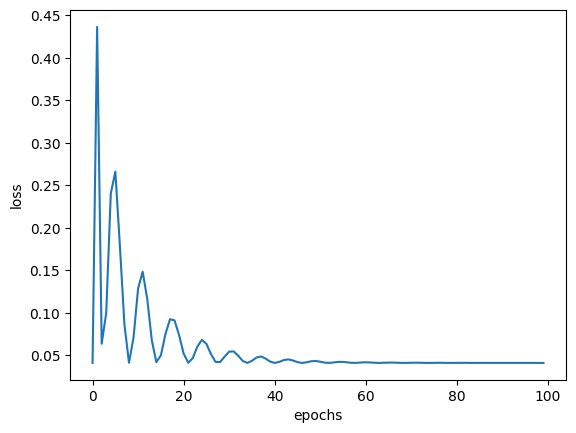

In [148]:
plt.plot(range(epochs),losses)
plt.xlabel('epochs')
plt.ylabel('loss')

In [151]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.04711723


In [154]:
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:2}. {str(y_val):38}  {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-12.3434,   9.9014,  -1.1303])  1
 2. tensor([-14.2688,  10.8432,  -0.6201])  1
 3. tensor([ 21.2170,   0.5515, -33.1016])  0
 4. tensor([-17.9909,   9.7244,   3.4787])  1
 5. tensor([-25.2933,   7.9262,  11.0912])  2
 6. tensor([-38.4672,   6.6540,  22.7703])  2
 7. tensor([ 20.4051,   1.2904, -32.3896])  0
 8. tensor([ 22.6308,   0.5217, -35.1925])  0
 9. tensor([-28.0869,   8.2653,  12.9321])  2
10. tensor([-35.5129,   7.6631,  19.3945])  2
11. tensor([-37.0396,   7.3098,  20.9642])  2
12. tensor([ 21.2258,   0.1886, -32.8691])  0
13. tensor([-35.4168,   7.2368,  19.7762])  2
14. tensor([-17.3942,   9.5024,   3.2450])  1
15. tensor([-31.0588,   8.2841,  15.2529])  2
16. tensor([-12.8722,  10.5581,  -1.4140])  1
17. tensor([-22.9931,   8.5656,   8.6308])  2
18. tensor([ 23.0360,   0.4141, -35.7247])  0
19. tensor([-18.7602,   9.8792,   3.9224])  1
20. tensor([-31.4580,   8.6677,  15.1407])  2
21. tensor([ 22.2116,   0.2015, -34.3499])  0
22. tensor([ 22.5853,   1.5003, -3

In [155]:
torch.save(model.state_dict(), 'IrisDatasetModel.pt')

In [156]:
new_model = Model()
new_model.load_state_dict(torch.load('IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)

In [157]:
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.04711723


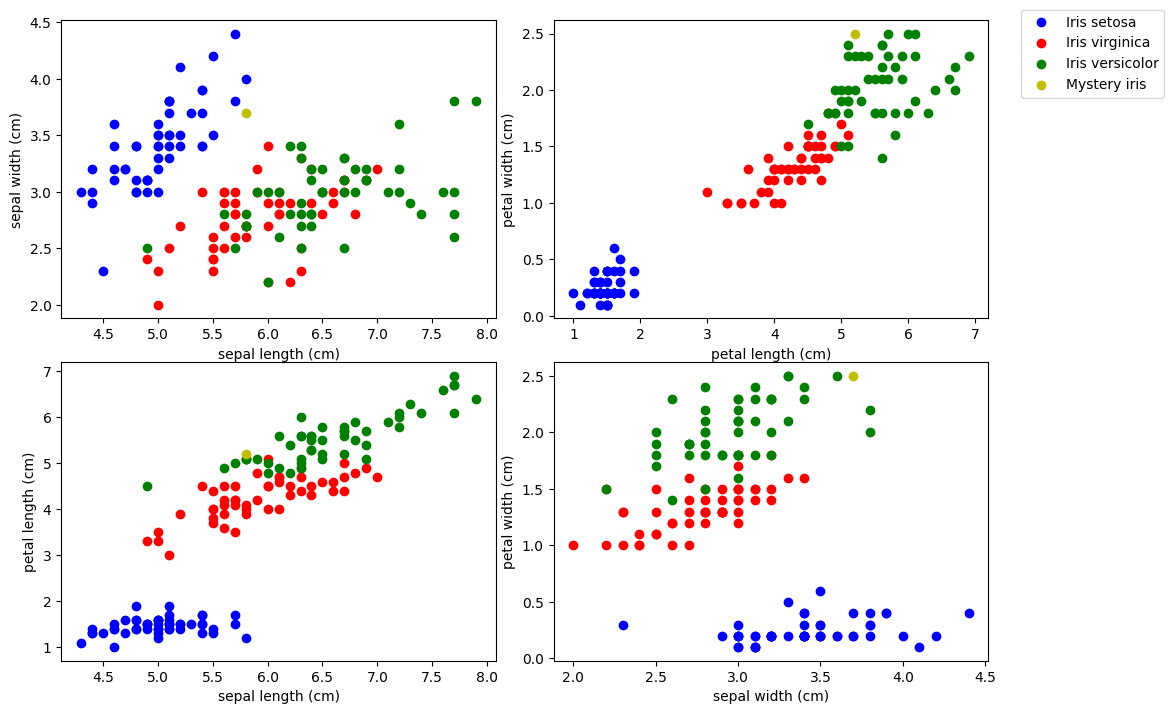

In [161]:
mystery_iris = torch.tensor([5.8,3.7,5.2,2.5])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [163]:
with torch.no_grad():
    print(new_model.forward(mystery_iris))
    print()
    print(labels[new_model(mystery_iris).argmax()])

tensor([-32.3054,   7.5100,  17.0521])

Iris versicolor
